# Reading a bagfile from the cloud location

## Install bagpy

In [1]:
!pip install bagpy

     |████████████████████████████████| 204kB 6.5MB/s 
     |████████████████████████████████| 1.1MB 12.8MB/s 
     |████████████████████████████████| 215kB 24.9MB/s 
     |████████████████████████████████| 194kB 34.5MB/s 
     |████████████████████████████████| 604kB 29.7MB/s 
     |████████████████████████████████| 13.7MB 254kB/s 
     |████████████████████████████████| 6.4MB 47.4MB/s 
     |████████████████████████████████| 10.8MB 48.6MB/s 
     |████████████████████████████████| 1.2MB 41.9MB/s 
     |████████████████████████████████| 102kB 11.2MB/s 
     |████████████████████████████████| 327kB 48.1MB/s 
     |████████████████████████████████| 245kB 50.3MB/s 
     |████████████████████████████████| 1.7MB 51.0MB/s 
     |████████████████████████████████| 532kB 44.1MB/s 
     |████████████████████████████████| 2.3MB 40.0MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 81kB 10.1MB/s 
     |████████████████████████████████| 194kB 52.4M

In [2]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


## Get the sample bag files

In [3]:
!wget https://data.ouster.io/sample-data-1.13/OS1-64/OS1-64_city1.bag

--2020-10-12 20:43:01--  https://data.ouster.io/sample-data-1.13/OS1-64/OS1-64_city1.bag
Resolving data.ouster.io (data.ouster.io)... 172.67.72.60, 104.26.15.246, 104.26.14.246, ...
Connecting to data.ouster.io (data.ouster.io)|172.67.72.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4758061988 (4.4G) [application/octet-stream]
Saving to: ‘OS1-64_city1.bag’

OS1-64_city1.bag    100%[===================>]   4.43G  46.1MB/s    in 60s     

2020-10-12 20:44:02 (75.2 MB/s) - ‘OS1-64_city1.bag’ saved [4758061988/4758061988]



## Read the bag file

In [4]:
b = bagreader('OS1-64_city1.bag') 

[INFO]  Successfully created the data folder OS1-64_city1.


## Check available topics

In [5]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/os1_cloud_node/imu,sensor_msgs/Imu,5999,100.203163
1,/os1_cloud_node/points,sensor_msgs/PointCloud2,601,9.989316
2,/os1_node/imu_packets,ouster_ros/PacketMsg,5999,100.111083
3,/os1_node/lidar_packets,ouster_ros/PacketMsg,76805,21076.904523
4,/rosout,rosgraph_msgs/Log,2,44.002350
5,/rosout_agg,rosgraph_msgs/Log,2,44.107390


## Decode messages on every topic

In [7]:
data = b.message_by_topic('/os1_cloud_node/imu')
print("File saved: {}".format(data))

File saved: OS1-64_city1/os1_cloud_node-imu.csv


## Read the data in pandas DataFrame

In [9]:
df_imu = pd.read_csv(data)
df_imu

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,orientation.x,orientation.y,orientation.z,orientation.w,orientation_covariance_0,orientation_covariance_1,orientation_covariance_2,orientation_covariance_3,orientation_covariance_4,orientation_covariance_5,orientation_covariance_6,orientation_covariance_7,orientation_covariance_8,angular_velocity.x,angular_velocity.y,angular_velocity.z,angular_velocity_covariance_0,angular_velocity_covariance_1,angular_velocity_covariance_2,angular_velocity_covariance_3,angular_velocity_covariance_4,angular_velocity_covariance_5,angular_velocity_covariance_6,angular_velocity_covariance_7,angular_velocity_covariance_8,linear_acceleration.x,linear_acceleration.y,linear_acceleration.z,linear_acceleration_covariance_0,linear_acceleration_covariance_1,linear_acceleration_covariance_2,linear_acceleration_covariance_3,linear_acceleration_covariance_4,linear_acceleration_covariance_5,linear_acceleration_covariance_6,linear_acceleration_covariance_7,linear_acceleration_covariance_8
0,1.573857e+09,58468,674,304318020,/os1_imu,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.009987,-0.004527,0.019574,0.0006,0.0,0.0,0.0,0.0006,0.0,0.0,0.0,0.0006,-0.237026,1.115698,8.379706,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.01
1,1.573857e+09,58469,674,314318050,/os1_imu,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.008655,-0.012650,0.018376,0.0006,0.0,0.0,0.0,0.0006,0.0,0.0,0.0,0.0006,-0.423774,1.189918,8.793903,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.01
2,1.573857e+09,58470,674,324318430,/os1_imu,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.009321,-0.020906,0.012117,0.0006,0.0,0.0,0.0,0.0006,0.0,0.0,0.0,0.0006,-0.325611,1.113304,8.585607,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.01
3,1.573857e+09,58471,674,334318030,/os1_imu,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.005593,-0.009055,0.013049,0.0006,0.0,0.0,0.0,0.0006,0.0,0.0,0.0,0.0006,-0.117316,1.185130,8.384494,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.01
4,1.573857e+09,58472,674,344318430,/os1_imu,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.007191,0.004128,0.017044,0.0006,0.0,0.0,0.0,0.0006,0.0,0.0,0.0,0.0006,0.011971,1.312023,8.834604,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,1.573857e+09,64462,734,244317440,/os1_imu,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.007457,0.011185,0.007989,0.0006,0.0,0.0,0.0,0.0006,0.0,0.0,0.0,0.0006,-0.972046,1.082179,8.556877,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.01
5995,1.573857e+09,64463,734,254317500,/os1_imu,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.003462,0.002663,0.012916,0.0006,0.0,0.0,0.0,0.0006,0.0,0.0,0.0,0.0006,-0.828394,1.177947,8.401254,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.01
5996,1.573857e+09,64464,734,264317830,/os1_imu,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.001598,-0.013183,0.013715,0.0006,0.0,0.0,0.0,0.0006,0.0,0.0,0.0,0.0006,-0.746991,1.187524,8.501810,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.01
5997,1.573857e+09,64465,734,274317440,/os1_imu,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.001065,-0.007989,0.012916,0.0006,0.0,0.0,0.0,0.0006,0.0,0.0,0.0,0.0006,-0.620098,1.067814,8.482656,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.01


## Plot

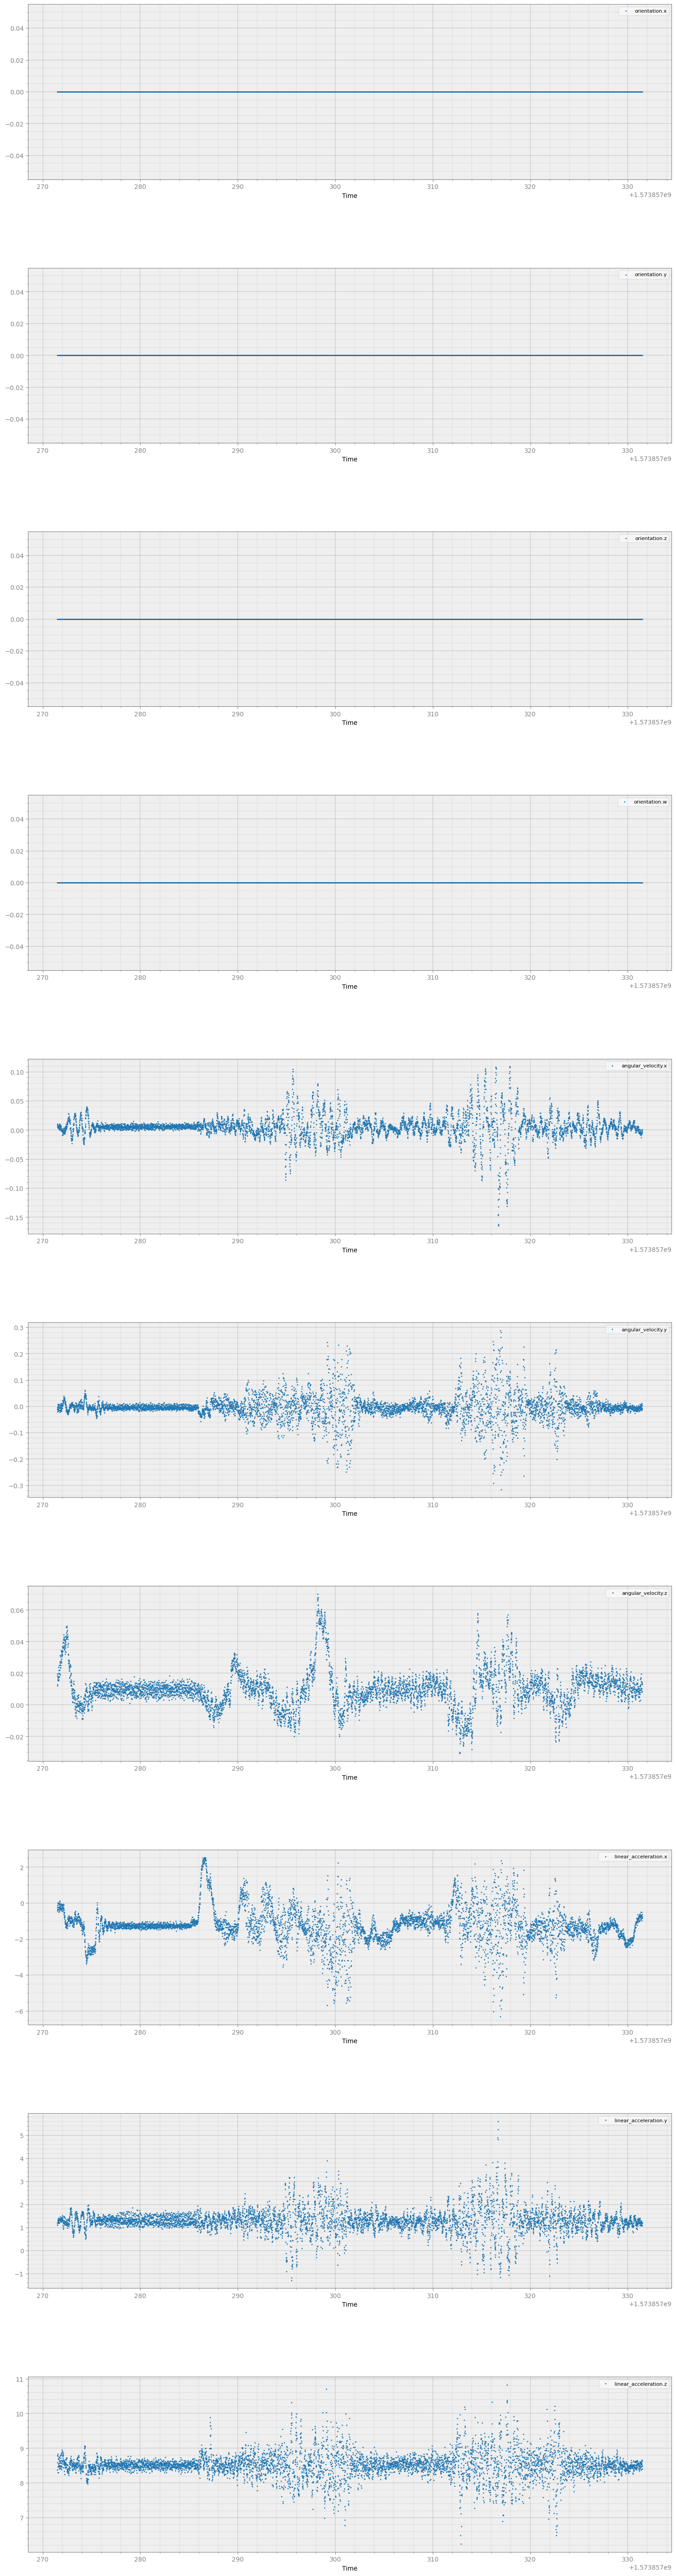

In [11]:
fig, ax = bagpy.create_fig(10)
ax[0].scatter(x = 'Time', y = 'orientation.x', data  = df_imu, s= 1, label = 'orientation.x')
ax[1].scatter(x = 'Time', y = 'orientation.y', data  = df_imu, s= 1, label ='orientation.y')
ax[2].scatter(x = 'Time', y = 'orientation.z', data  = df_imu, s= 1, label = 'orientation.z')
ax[3].scatter(x = 'Time', y = 'orientation.w', data  = df_imu, s= 1, label ='orientation.w')
ax[4].scatter(x = 'Time', y = 'angular_velocity.x', data  = df_imu, s= 1, label = 'angular_velocity.x')
ax[5].scatter(x = 'Time', y = 'angular_velocity.y', data  = df_imu, s= 1, label = 'angular_velocity.y')
ax[6].scatter(x = 'Time', y = 'angular_velocity.z', data  = df_imu, s= 1, label = 'angular_velocity.z')
ax[7].scatter(x = 'Time', y = 'linear_acceleration.x', data  = df_imu, s= 1, label = 'linear_acceleration.x')
ax[8].scatter(x = 'Time', y = 'linear_acceleration.y', data  = df_imu, s= 1, label = 'linear_acceleration.y')
ax[9].scatter(x = 'Time', y = 'linear_acceleration.z', data  = df_imu, s= 1, label = 'linear_acceleration.z')
for axis in ax:
    axis.legend()
    axis.set_xlabel('Time')

plt.show()

In [12]:
data = b.message_by_topic('/rosout_agg')
df_rosout = pd.read_csv(data)
df_rosout

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,level,name,msg,file,function,line,topics
0,1.573857e+09,11,1573857271,484865238,NaN,2,/record_1573856971468545184,Closing drive1-os1-64_2019-11-15-14-33-31_4.bag.,/tmp/binarydeb/ros-melodic-rosbag-1.14.3/src/r...,Recorder::stopWriting,398,[]
1,1.573857e+09,12,1573857271,508070115,NaN,2,/record_1573856971468545184,Recording to drive1-os1-64_2019-11-15-14-34-31...,/tmp/binarydeb/ros-melodic-rosbag-1.14.3/src/r...,Recorder::startWriting,394,[]
